In [2]:
# 从https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data下载的Breast Cancer Wisconsin (Diagnostic) Data Set
import pandas as pd

df = pd.read_csv('wdbc.data', header=None)
# Fields:
# 1 = ID (unique?)
# 2 = Diagnosis (M = malignant, B = benign)
# 3+ = X

In [3]:
# Look at some of the data
# Column 1 M or B is the Y (label we want to predict), the other columns besides Column 0 (which is Transaction ID) are X
# 因为Column 0 Transaction ID有可能有重复，我们需要确认一下，如果它有重复ID，说明有duplicate的病人病历，这会影响我们的model
df.iloc[:10,:]

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [4]:
len(df)

569

In [5]:
df.iloc[:,0].unique

<bound method Series.unique of 0        842302
1        842517
2      84300903
3      84348301
4      84358402
5        843786
6        844359
7      84458202
8        844981
9      84501001
10       845636
11     84610002
12       846226
13       846381
14     84667401
15     84799002
16       848406
17     84862001
18       849014
19      8510426
20      8510653
21      8510824
22      8511133
23       851509
24       852552
25       852631
26       852763
27       852781
28       852973
29       853201
         ...   
539      921362
540      921385
541      921386
542      921644
543      922296
544      922297
545      922576
546      922577
547      922840
548      923169
549      923465
550      923748
551      923780
552      924084
553      924342
554      924632
555      924934
556      924964
557      925236
558      925277
559      925291
560      925292
561      925311
562      925622
563      926125
564      926424
565      926682
566      926954
567      927241
568      

In [6]:
# as per our finding above, Transaction ID (Column 0) is unique without any duplicate

# Now Split data into X and Y
X = df.iloc[:, 2:]
Y = df.iloc[:, 1]
Y[100]

'M'

In [7]:
X.head(5)

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
# Do some cross validation, cuz 我们这里没有什么test set可供使用

# Create an instance of kNN and use it
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# n_neighbors is just k
clf = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(clf, X, Y, cv=5)
# the performance is good, the worst都达到了87.8%
# http://sklearn.lzjqsdd.com/modules/cross_validation.html 有关 cv，应该是折叠5次
scores

array([ 0.87826087,  0.92173913,  0.94690265,  0.9380531 ,  0.91150442])

In [9]:
# Scale features to get rid of artifically large distances

from sklearn.preprocessing import scale

X_scaled = scale(X)
scores = cross_val_score(clf, X_scaled, Y, cv=5)
scores.mean()

0.95776837245094271

In [10]:
# This is how the standard scaler works (using "transformer" inter)
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_scaled = scalar.fit(X).transform(X)

# There are other types of scalars, not discussed in depth -- eg.
# MinMaxScaler or MaxAbsScaler (scaling within a range)
# MaxAbsScaler (scaling sparse data)
# RobustScaler (scaling and ignoring outliers)

In [11]:
# How good is 95+%?
# 下面我们进一步用前80%作training set，最后20%的数据作test set，发现准确率有92.98%

splitpoint = int(len(Y) * 0.8)
train_x = X.iloc[:splitpoint, :]
train_y = Y.iloc[:splitpoint]

test_x = X.iloc[splitpoint:, :]
test_y = Y.iloc[splitpoint:]

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix

clf.fit(train_x, train_y)
hypotheses = clf.predict(test_x)
print ('Accuracy: %0.4f' % (accuracy_score(test_y, hypotheses)))

# 下一步我们看看confusion matrix，看看到底在恶性cancer比如M上的预测情况如何，这样我们就能知道误判率
print ('Confusion matrix', confusion_matrix(test_y, hypotheses))

Accuracy: 0.9298
Confusion matrix [[81  7]
 [ 1 25]]


In [16]:
# 但是其实我们也不清楚上面的confusion matrix里，哪个列是M-恶性肿瘤，哪个列是B-良性肿瘤，所以我们用下面数数的方法guess一下
tp = 0.
tn = 0.
fp = 0.
fn = 0.
total = 0.
for h, l in zip(hypotheses, test_y):
    total += 1.
    if h == l and h == 'M':
        tp += 1.
    elif h != l and h == 'M':
        fp += 1.
    elif h == l and h == 'B':
        tn += 1.
    else:
        fn += 1.
print ('Correctly classified as malignant: %d' % (tp))
print ('Correctly classified as benigh: %d' % (tn))
print ('Incorrectly classified as malignant: %d' % (fp))
print ('Incorrectly classified as benigh: %d' % (fn))

Correctly classified as malignant: 25
Correctly classified as benigh: 81
Incorrectly classified as malignant: 7
Incorrectly classified as benigh: 1


In [28]:
from sklearn.metrics import f1_score

precision = tp / (tp + fp)
recall = tp / (tp + fn)

print ('Precision = %0.4f' %(precision))
print ('Recall = %0.4f' %(recall))
# 好像老师上课讲的意思是说，F_1代表，how well do I specifically perform on only malignant cancer prediction? 就是我只关注我在恶性肿瘤上的预测准确率有多高，而不是关注我在所有肿瘤类型恶性+良性一共的准确率有多高（因为你想啊，如果本身有90%的患者都是良性肿瘤，只有10%的患者是恶性肿瘤，那就算我的model再傻逼，我预测全部患者都是良性肿瘤，那我的准确率还有90%呢，但其实这没任何意义）
print ('F1 (malignant) = %0.4f' %((2*precision*recall) / (precision + recall)))

# Alternatively, I can do the same with sklearn to calculate F1, that should be the same result with our manual result above
f1 = f1_score(test_y, hypotheses, labels='M', average="micro")
print ('F1 (malignant) from sklearn: %0.4f' %(f1))

Precision = 0.7812
Recall = 0.9615
F1 (malignant) = 0.8621
F1 (M) from sklearn: 0.8621


In [ ]:
# 在下面的过程中我们画下ROC曲线和看看AUC值，
# 参见百度百科对ROC和AUC的解释：https://baike.baidu.com/item/ROC%E6%9B%B2%E7%BA%BF/775606?fr=aladdin
# 选择最佳的诊断界限值。ROC曲线越靠近左上角,试验的准确性就越高。最靠近左上角的ROC曲线的点是错误最少的最好阈值，其假阳性和假阴性的总数最少。
# 最靠近左上角的ROC曲线所代表的受试者工作最准确。哪一种试验的 AUC最大，则哪一种试验的诊断价值最佳。

In [29]:
def convert_y(old_y):
    import numpy as np
    conv = []
    for y in old_y:
        if y == 'B':
            conv.append(0)
        else:
            conv.append(1)
    return np.array(conv)

In [37]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

# Cannot be 'M' or 'B' but 0, 1 are okay
test_y_conv = convert_y(test_y)
hypo_y_conv = convert_y(hypotheses)

# 疑问，为什么i要设0和1两个值，roc_auc[0]和roc_auc[1]值一样啊？！
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(test_y_conv, hypo_y_conv, pos_label=1)
    roc_auc[i] = auc(fpr[i], tpr[i])

In [48]:
roc_auc[0]

0.94099650349650354

In [49]:
roc_auc[1]

0.94099650349650354

In [52]:
fpr[1]

array([ 0.        ,  0.07954545,  1.        ])

In [53]:
tpr[0]

array([ 0.        ,  0.96153846,  1.        ])

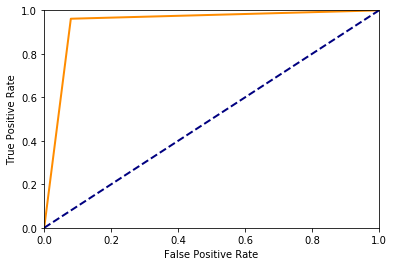

In [47]:
# plot the ROC curve for the above.
import matplotlib.pyplot as plt

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange', lw=lw, label='ROC curve (area= %0.4f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()